# Proyecto 2 

github: [link aqui](https://github.com/DanielRasho/MD-Proyecto2)

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, explained_variance_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
# from statsmodels.graphics.gofplots import qqplot
import setuptools.dist
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
# import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

## Cargado de datos


In [3]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Limpieza de datos

Primero, se realiza una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, nos ayuda a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Primero, es importante eliminar las filas que contienen datos incompletos. Para ello, contaremos cuántos valores nulos hay en cada columna. Esto nos permitirá determinar si la cantidad de filas con valores faltantes es insignificante. Si encontramos columnas con un número excesivo de valores nulos (según nuestro criterio, más de 40), estas deberán ser eliminadas.

In [5]:
# Encontrar las columnas que tienen los mayores valores nulos
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


In [6]:
# Encontrar las columnas que tienen los mayores valores nulos
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


In [7]:
# Encontrar las columnas que tienen los mayores valores nulos
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


### Criterios de eliminacion de columnas

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Columas eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* PoolQC → 99.52% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Alley → 93.77% de datos nulos.
* Fence → 80.75% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

### Posteriormente

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que estan incompletas.

In [8]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()

In [9]:
# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

Después de obtener un dataset más limpio, el siguiente paso fue analizar su estructura con mayor detalle. Para ello, verificamos la cantidad de filas y columnas restantes, lo que nos permitió entender la dimensión de los datos después del proceso de limpieza.

Además, realizamos una nueva inspección en busca de datos duplicados, junto con los tipos de datos para tener una mejor compresion y asi para evitar cualquier tipo de sesgo.

## Clasificación de Precios

Para las futuras secciones donde se va a estar construyendo árboles de clasificación es esencial primero crear la "etiqueta de respuestas" para que los algoritmos puedan entrenarse. Para ello vamos a dividir los precios en 3 categorías.

Esta división se hará encontrando los terciles en el dataset y asignando a cada nuevo dato una nueva variable de "SalePriceCategory" dependiendo en que tercil se encuentren.

- Económico $\rightarrow$ tercil 1
- Intermedio $\rightarrow$ tercil 2
- Caro $\rightarrow$ tercil 3


In [10]:
# Crear cuartiles de precios (se pueden ajustar los rangos según el dataset)
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])

/tmp/ipykernel_6491/758326232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])


### Datos de entrenamiento y Test

Como se puede apreciar en la figura de abajo, la distribución de precios parece ser cercana a la normal con un sesgo para la izquierda, esto significa que no hay la misma cantidad de casas con costos bajos con respecto a precios intermedios, lo mismo ocurre con los precios altos, por lo que para evitar favorecer una clase más que a otra al repartir entre grupos de entrenamiento y test se usara división estratificada.

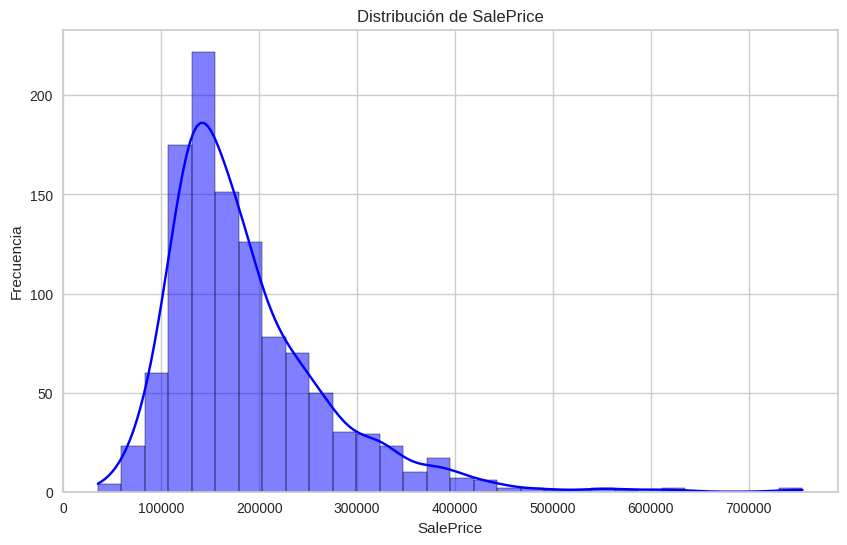

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["SalePrice"], bins=30, kde=True, color="blue")
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.title("Distribución de SalePrice")
plt.show()

In [12]:
# División estratificada
train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned["SalePriceCategory"])

## Árbol de Regresion

## Árbol de clasififación